In [1]:
from mesa import Agent, Model
from mesa.space import MultiGrid
from mesa.time import RandomActivation
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
class Lobo(Agent):
    # Agentes que se comen a las ovejas.
    def __init__(self, unique_id, pos,e,model):
        # la clase agente guarda los ids y los enlaza con el modelo 
        super().__init__(unique_id,model)
        # lobos tienen energia, y una posicion 
        self.energia = e
        self.pos = pos
    
    def move(self):
        # get_neighbourhood es utilidad de mesa pa devolver los vecinos
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=False,
            include_center=False)
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)
        
    def step(self):
        self.move()
         
        # comerse alguna oveja que este en su grilla 
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        sheep = [obj for obj in cellmates if isinstance(obj, Oveja)]
        if len(sheep)>0: 
            victima = self.random.choice(sheep)
            self.model.grid._remove_agent(self.pos, victima)
            self.model.schedule.remove(victima)
            self.energia += 10
            
        # tener hijos           
        if self.model.random.randint(1,10) < 2: 
            self.energia /= 2
            hijo = Lobo(self.model.next_id(),self.pos,self.energia,self.model)
            self.model.grid.place_agent(hijo, hijo.pos)
            self.model.schedule.add(hijo)
            
        #si no tengo energia, muero 
        self.energia -= 1
        if self.energia < 1: 
            self.model.grid._remove_agent(self.pos, self)
            self.model.schedule.remove(self)
            return
        


In [116]:
class Oveja(Agent):
    def __init__(self, unique_id,pos, model):
        super().__init__(unique_id, model)
        self.pos = pos

    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=False,
            include_center=False)
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)
        
    def step(self):
        self.move()
            
        if self.model.random.randint(1,10) < 3: 
            hija = Oveja(self.model.next_id(),self.pos,self.model)
            self.model.grid.place_agent(hija, hija.pos)
            self.model.schedule.add(hija)
            

In [117]:
class Lobooveja(Model):
    def __init__(self, N,M, width, height):
        self.num_lobos = N
        self.num_ovejas = M
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)
        self.current_id = 0
        # Create agents
        for i in range(self.num_lobos):
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            l = Lobo(self.next_id(),(x,y),15,self)
            self.schedule.add(l)
            # Add the agent to a random grid cell
            self.grid.place_agent(l, (x, y))
        # Create agents
        for i in range(self.num_ovejas):
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            o = Oveja(self.next_id(),(x,y),self)
            self.schedule.add(o)
            # Add the agent to a random grid cell
            self.grid.place_agent(o, (x, y))      

    def step(self):
        self.schedule.step()

In [118]:
ovejas = []
lobos = []
for j in range(2):
    ovejas.append([])
    lobos.append([])
    model = Lobooveja(10,30, 10, 10)
    for i in range(200):
        model.step()
        ovejas[j].append(0)
        lobos[j].append(0)
        for a in model.schedule.agents:
            if isinstance(a,Oveja): 
                ovejas[j][i]+=1
            else:
                lobos[j][i]+=1
    
    

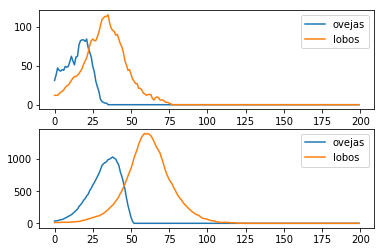

In [119]:
plt.subplot(2,1,1)
plt.plot(ovejas[0], label = "ovejas")
plt.plot(lobos[0], label = "lobos")
plt.legend()

plt.subplot(2,1,2)
plt.plot(ovejas[1], label = "ovejas")
plt.plot(lobos[1], label = "lobos")
plt.legend()
